# Review
Latent space를 3D 로 바꾸었을 때 VAE의 performance가 증가하는지 감소하는지 2D의 경우와 비교하라.

-> 2D 일 경우, 200번의 training 을 시켰을 때, loss: 42.2248 - vae_r_loss: 36.6325 - vae_kl_loss: 5.5923 정도의 손실률이 있었지만 전체적으로 생성자가 안정적이었던 것 같다. 하지만 아래 3D의 경우는, 같은 training을 시켰을때, loss: 37.7509 - vae_r_loss: 30.5313 - vae_kl_loss: 7.2196 정도의 손실률이 있었다. 하지만 생성자가 3이라는 이미지만 계속해서 생성해내는 것으로 보아... 뭔가 붕괴현상이 생긴듯 하다. 성능은 이 데이터 셋의 경우 큰~ 차이가 없는 것 같고 안정적인 2D를 사용하는 것이 더 나을 것 같다...

# Variational AutoEncoder - MNIST

In [0]:
# 자신의 Google Disk home을 colab server의 어떤 directory로 mount 할 지 이름을 정합니다. 
# 아래의 예에서는 "/drive"에 mount 하였습니다.
# 실제로 colab server는 '/drive/My Drive' directory에 자신의 Google Disk home을 가지게 됩니다. 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import sys
# path를 append: 나의 source directory는 Google Disk의 Colab Notebooks/Lecture 아래에 있다고 가정
sys.path.append('/content/drive/My Drive/Lecture')
# local library인 utils.loaders와 models.AE class를 import
from utils.loaders import load_mnist, load_model
from models.VAE import VariationalAutoencoder
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [0]:
# 실행 매개변수
SECTION = 'vae'
RUN_ID = '0003'
DATA_NAME = 'digits'
RUN_FOLDER = '/content/drive/My Drive/Lecture/run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## Loading Data

In [0]:
(x_train, y_train), (x_test, y_test) = load_mnist()

## Model Creation

In [0]:
vae = VariationalAutoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 3
)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [35]:
vae.encoder.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_22 (LeakyReLU)      (None, 28, 28, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 14, 14, 64)   18496       leaky_re_lu_22[0][0]             
___________________________________________________________________________________________

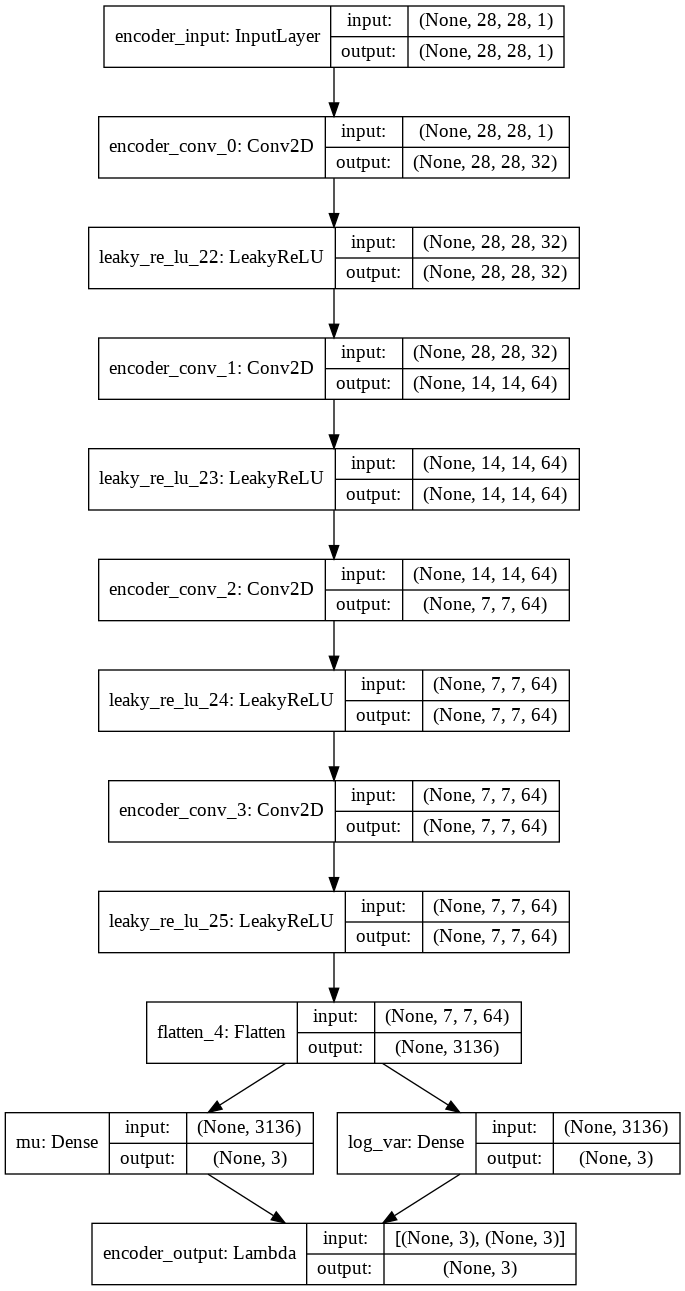

In [36]:
from keras.utils import plot_model
plot_model(vae.encoder, to_file='vae_encoder.png', show_shapes = True, show_layer_names = True)

![VAE Encoder](vae_encoder.png "VAE Encoder")

In [37]:
vae.decoder.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 3)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 3136)              12544     
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 14, 14, 64)        0  

## Training Model

In [0]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000

In [0]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

In [0]:
BATCH_SIZE = 32
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [41]:
vae.train(     
    x_train[:10000]
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
10000/10000 [==============================] - 3s 321us/step - loss: 73.6515 - vae_r_loss: 70.2320 - vae_kl_loss: 3.4195

Epoch 00001: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-001-73.65.h5

Epoch 00001: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 2/200
10000/10000 [==============================] - 3s 261us/step - loss: 53.1886 - vae_r_loss: 48.7751 - vae_kl_loss: 4.4135

Epoch 00002: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-002-53.19.h5

Epoch 00002: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 3/200
10000/10000 [==============================] - 3s 265us/step - loss: 49.9284 - vae_r_loss: 45.0406 - vae_kl_loss: 4.8878

Epoch 00003: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-003-49.93.h5

Epoch 00003: saving model to /content/drive/My Drive/Lecture/run/

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.158203). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 279us/step - loss: 47.0710 - vae_r_loss: 41.6853 - vae_kl_loss: 5.3857

Epoch 00006: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-006-47.07.h5

Epoch 00006: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 7/200
10000/10000 [==============================] - 3s 264us/step - loss: 46.6974 - vae_r_loss: 41.1743 - vae_kl_loss: 5.5231

Epoch 00007: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-007-46.70.h5

Epoch 00007: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 8/200
10000/10000 [==============================] - 3s 277us/step - loss: 46.2699 - vae_r_loss: 40.6939 - vae_kl_loss: 5.5760

Epoch 00008: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-008-46.27.h5

Epoch 00008: saving model to /content/drive/My Drive/Lecture/run/vae/0003_dig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.161817). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 278us/step - loss: 41.5136 - vae_r_loss: 35.0600 - vae_kl_loss: 6.4536

Epoch 00041: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-041-41.51.h5

Epoch 00041: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 42/200
10000/10000 [==============================] - 3s 261us/step - loss: 41.4376 - vae_r_loss: 34.9167 - vae_kl_loss: 6.5209

Epoch 00042: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-042-41.44.h5

Epoch 00042: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 43/200
10000/10000 [==============================] - 3s 260us/step - loss: 41.4088 - vae_r_loss: 34.9020 - vae_kl_loss: 6.5068

Epoch 00043: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-043-41.41.h5

Epoch 00043: saving model to /content/drive/My Drive/Lecture/run/vae/0003_d

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105495). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 270us/step - loss: 40.6316 - vae_r_loss: 33.9692 - vae_kl_loss: 6.6624

Epoch 00057: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-057-40.63.h5

Epoch 00057: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 58/200
10000/10000 [==============================] - 3s 265us/step - loss: 40.6304 - vae_r_loss: 33.9659 - vae_kl_loss: 6.6644

Epoch 00058: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-058-40.63.h5

Epoch 00058: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 59/200
10000/10000 [==============================] - 3s 264us/step - loss: 40.5875 - vae_r_loss: 33.9295 - vae_kl_loss: 6.6580

Epoch 00059: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-059-40.59.h5

Epoch 00059: saving model to /content/drive/My Drive/Lecture/run/vae/0003_d

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.134198). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 267us/step - loss: 39.3654 - vae_r_loss: 32.4753 - vae_kl_loss: 6.8901

Epoch 00096: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-096-39.37.h5

Epoch 00096: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 97/200
10000/10000 [==============================] - 3s 255us/step - loss: 39.3519 - vae_r_loss: 32.4149 - vae_kl_loss: 6.9370

Epoch 00097: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-097-39.35.h5

Epoch 00097: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 98/200
10000/10000 [==============================] - 3s 272us/step - loss: 39.2975 - vae_r_loss: 32.3319 - vae_kl_loss: 6.9656

Epoch 00098: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-098-39.30.h5

Epoch 00098: saving model to /content/drive/My Drive/Lecture/run/vae/0003_d

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.150186). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 270us/step - loss: 38.9470 - vae_r_loss: 31.9552 - vae_kl_loss: 6.9917

Epoch 00114: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-114-38.95.h5

Epoch 00114: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 115/200
10000/10000 [==============================] - 3s 257us/step - loss: 38.9357 - vae_r_loss: 31.8976 - vae_kl_loss: 7.0381

Epoch 00115: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-115-38.94.h5

Epoch 00115: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 116/200
10000/10000 [==============================] - 3s 266us/step - loss: 38.9735 - vae_r_loss: 31.9668 - vae_kl_loss: 7.0067

Epoch 00116: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-116-38.97.h5

Epoch 00116: saving model to /content/drive/My Drive/Lecture/run/vae/0003

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.151331). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 273us/step - loss: 38.4351 - vae_r_loss: 31.3458 - vae_kl_loss: 7.0892

Epoch 00140: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-140-38.44.h5

Epoch 00140: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 141/200
10000/10000 [==============================] - 3s 256us/step - loss: 38.4669 - vae_r_loss: 31.3830 - vae_kl_loss: 7.0839

Epoch 00141: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-141-38.47.h5

Epoch 00141: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 142/200
10000/10000 [==============================] - 3s 267us/step - loss: 38.4253 - vae_r_loss: 31.3129 - vae_kl_loss: 7.1124

Epoch 00142: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-142-38.43.h5

Epoch 00142: saving model to /content/drive/My Drive/Lecture/run/vae/0003

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.135814). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 273us/step - loss: 38.0716 - vae_r_loss: 30.8831 - vae_kl_loss: 7.1885

Epoch 00174: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-174-38.07.h5

Epoch 00174: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 175/200
10000/10000 [==============================] - 3s 256us/step - loss: 37.9860 - vae_r_loss: 30.8193 - vae_kl_loss: 7.1668

Epoch 00175: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-175-37.99.h5

Epoch 00175: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 176/200
10000/10000 [==============================] - 3s 259us/step - loss: 38.0829 - vae_r_loss: 30.8881 - vae_kl_loss: 7.1947

Epoch 00176: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-176-38.08.h5

Epoch 00176: saving model to /content/drive/My Drive/Lecture/run/vae/0003

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.118116). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 271us/step - loss: 38.0097 - vae_r_loss: 30.8223 - vae_kl_loss: 7.1874

Epoch 00179: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-179-38.01.h5

Epoch 00179: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 180/200
10000/10000 [==============================] - 3s 258us/step - loss: 38.0251 - vae_r_loss: 30.8154 - vae_kl_loss: 7.2098

Epoch 00180: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-180-38.03.h5

Epoch 00180: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5
Epoch 181/200
10000/10000 [==============================] - 3s 272us/step - loss: 37.9669 - vae_r_loss: 30.7838 - vae_kl_loss: 7.1831

Epoch 00181: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-181-37.97.h5

Epoch 00181: saving model to /content/drive/My Drive/Lecture/run/vae/0003

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.133099). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 268us/step - loss: 37.7509 - vae_r_loss: 30.5313 - vae_kl_loss: 7.2196

Epoch 00200: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights-200-37.75.h5

Epoch 00200: saving model to /content/drive/My Drive/Lecture/run/vae/0003_digits/weights/weights.h5


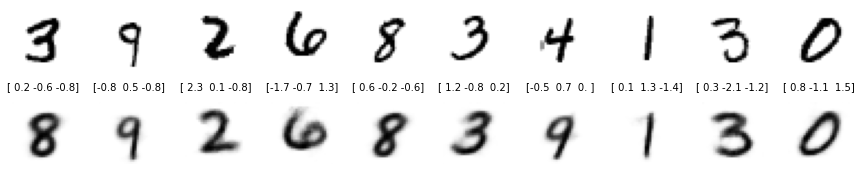

In [42]:
## Reconstructing Original Images

n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')

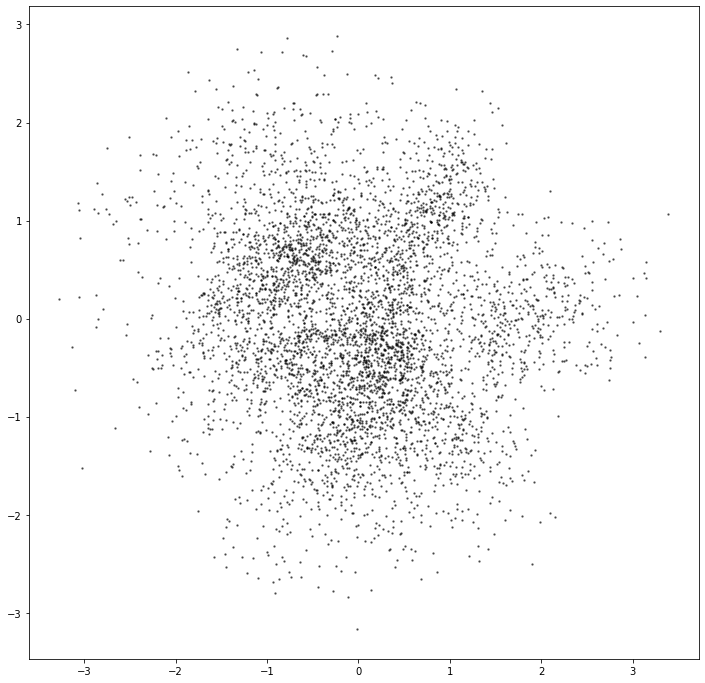

In [46]:
# Visualizing Latent Space
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

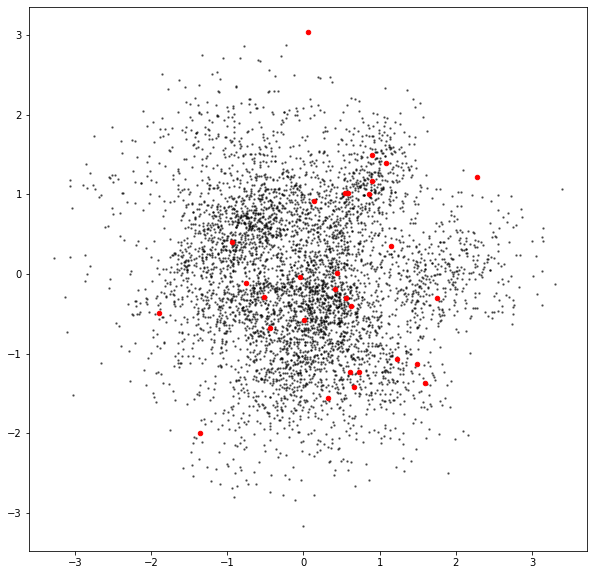

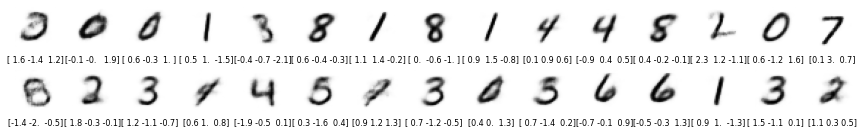

In [49]:
## Reconstruction from Non-Input point
figsize = 10
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)


grid_size = 15
grid_depth = 2
figsize = 15

x = np.random.normal(size = grid_size * grid_depth)
y = np.random.normal(size = grid_size * grid_depth)
z = np.random.normal(size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y, z)))
reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=8, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

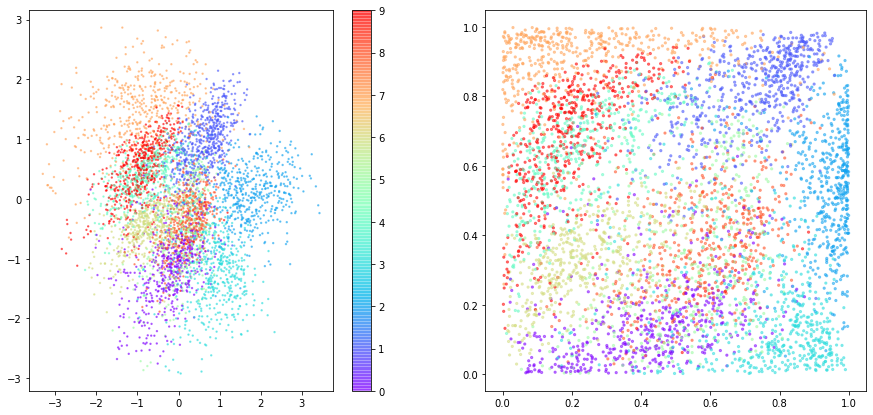

In [50]:
n_to_show = 5000
grid_size = 15
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(1, 2, 1)
plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c=example_labels
            , alpha=0.5, s=2)
plt.colorbar(plot_1)

ax = fig.add_subplot(1, 2, 2)
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , c=example_labels
            , alpha=0.5, s=5)

plt.show()

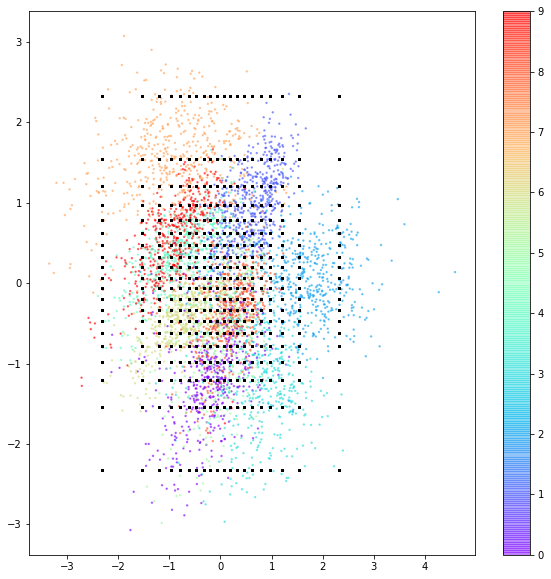

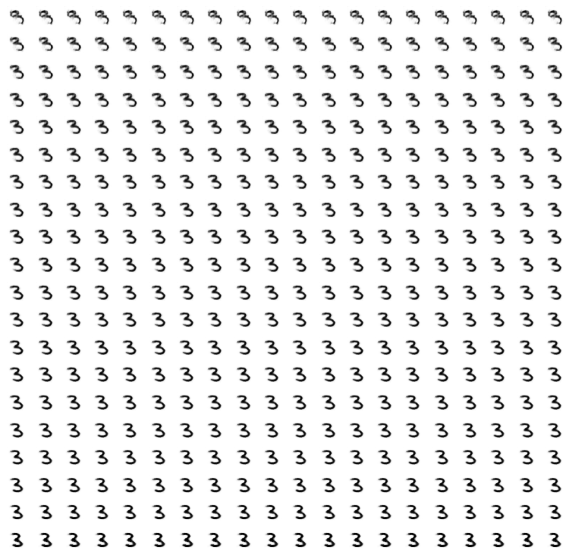

In [52]:
n_to_show = 5000
grid_size = 20
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
z = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv, zv = np.meshgrid(x, y, z)
xv = xv.flatten()
yv = yv.flatten()
zv = yv.flatten()
z_grid = np.array(list(zip(xv, yv, zv)))

reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=2)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')